In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, adjusted_rand_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
insurance_data = pd.read_csv('insurance.csv')

In [5]:
# first 5 rows of the dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# How many data points are there in it
insurance_data.shape

(1338, 7)

In [7]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Categorical Feature
# Numerical Feature

In [9]:
categorical_features = []
numerical_features = []
for col in insurance_data.columns:
    if insurance_data[col].dtypes == object:
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [10]:
categorical_features

['sex', 'smoker', 'region']

In [11]:
numerical_features

['age', 'bmi', 'children', 'charges']

In [12]:
# Checking any missing values
(insurance_data.isnull().sum()/insurance_data.shape[0])*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [13]:
# Data Analysis (EDA)

In [14]:
# Statistical Measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


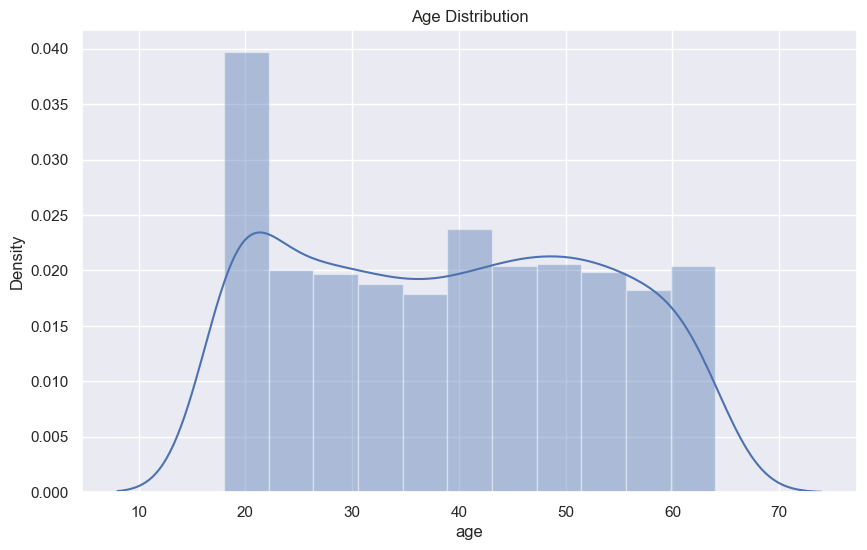

In [15]:
# Distribution of age feature
sns.set()
plt.figure(figsize=(10, 6))
sns.distplot(insurance_data['age'])
plt.title("Age Distribution")
plt.show()

most of the people are around 20-23 year old in the dataset

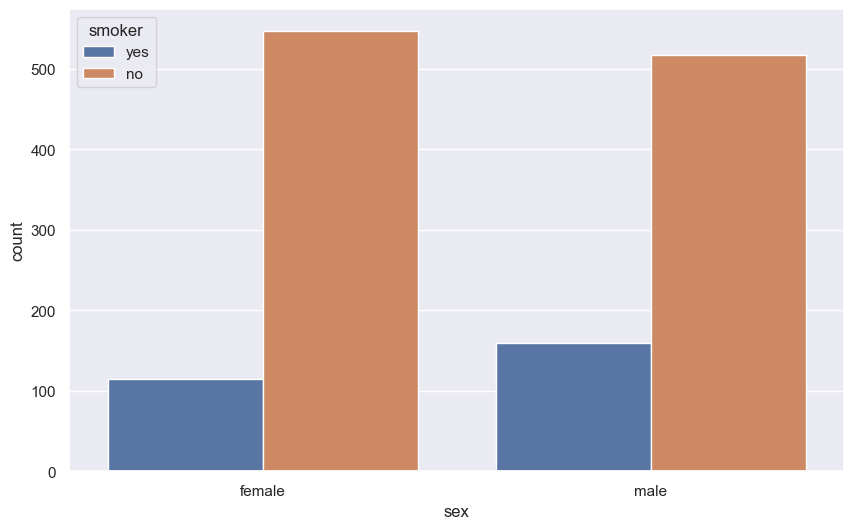

In [16]:
# lets see the gender feature
plt.figure(figsize=(10, 6))
sns.countplot(x = 'sex', data = insurance_data, hue = 'smoker')
plt.show()

In [17]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

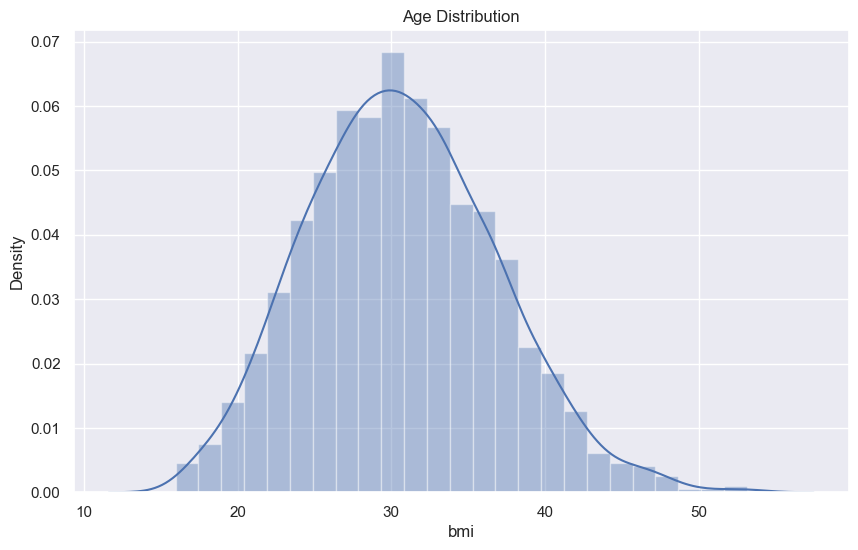

In [18]:
# Distribution of bmi feature
sns.set()
plt.figure(figsize=(10, 6))
sns.distplot(insurance_data['bmi'])
plt.title("Age Distribution")
plt.show()

as we can see this is perfectly normal distribution
more number of data has been concentrated at the mean values
Normal BMI range for a person :- (18.5 - 24.9)

so we can see more of the people in this data set is over weight

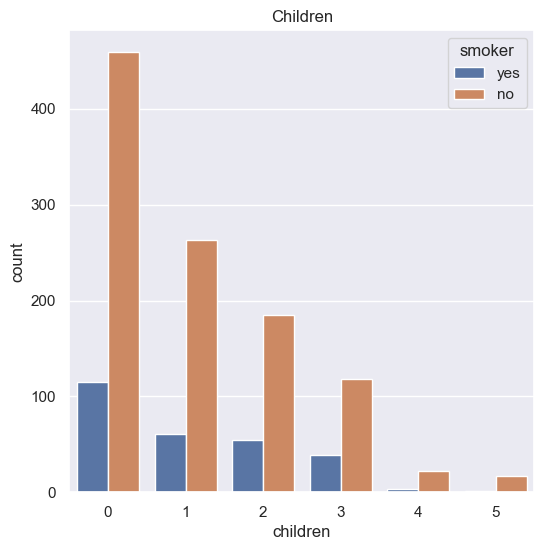

In [19]:
# lets see the gender feature
plt.figure(figsize=(6, 6))
sns.countplot(x = 'children', data = insurance_data, hue = 'smoker')
plt.title('Children')
plt.show()

From the above graph we can say that those who are a smoker have less number of child

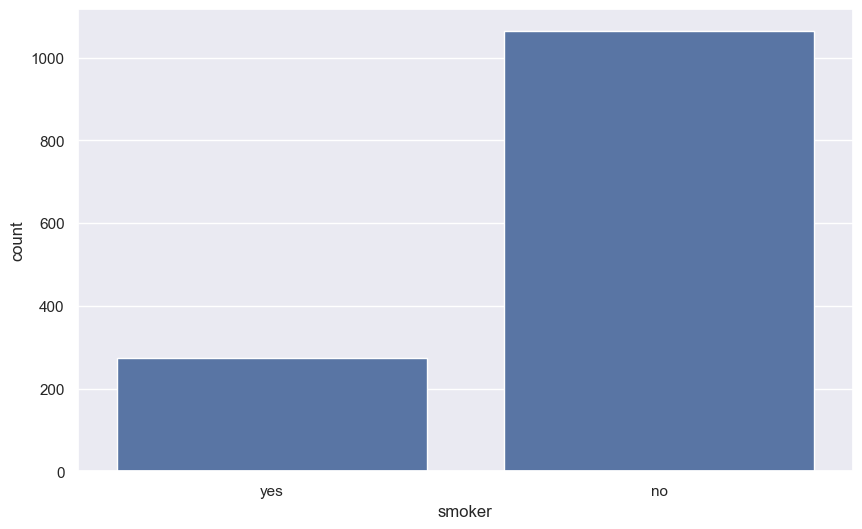

In [20]:
# lets see the gender feature
plt.figure(figsize=(10, 6))
sns.countplot(x = 'smoker', data = insurance_data)
plt.show()

In [21]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

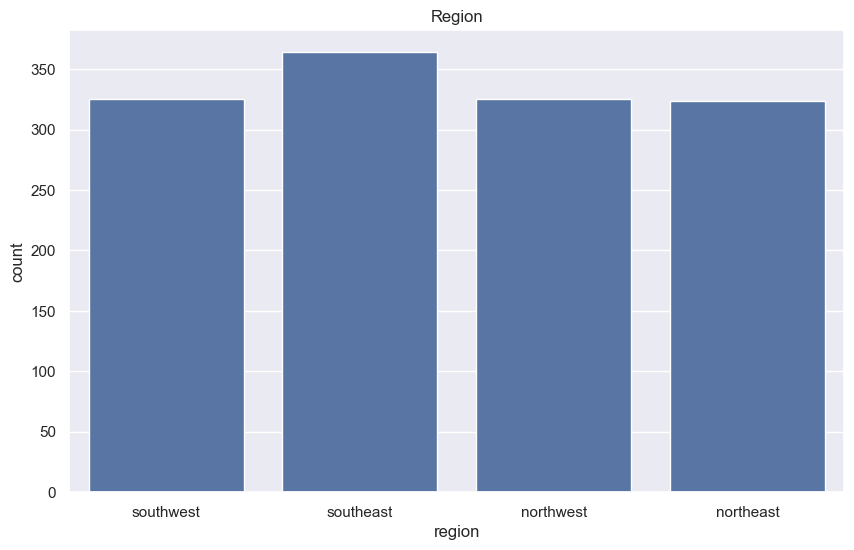

In [22]:
# lets understand which of people are smoking more and less
plt.figure(figsize=(10, 6))
sns.countplot(x = 'region', data = insurance_data)
plt.title("Region")
plt.show()

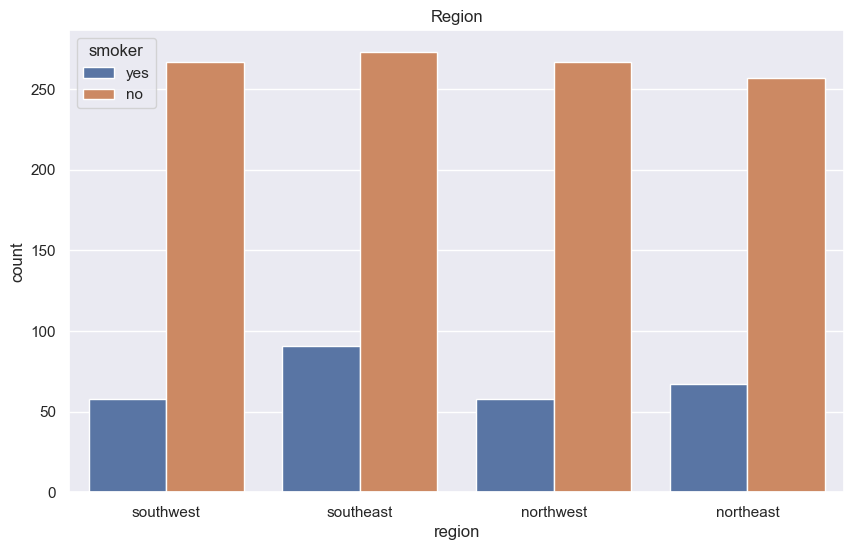

In [23]:
# lets understand which of people are smoking more and less
plt.figure(figsize=(10, 6))
sns.countplot(x = 'region', data = insurance_data, hue = 'smoker')
plt.title("Region")
plt.show()

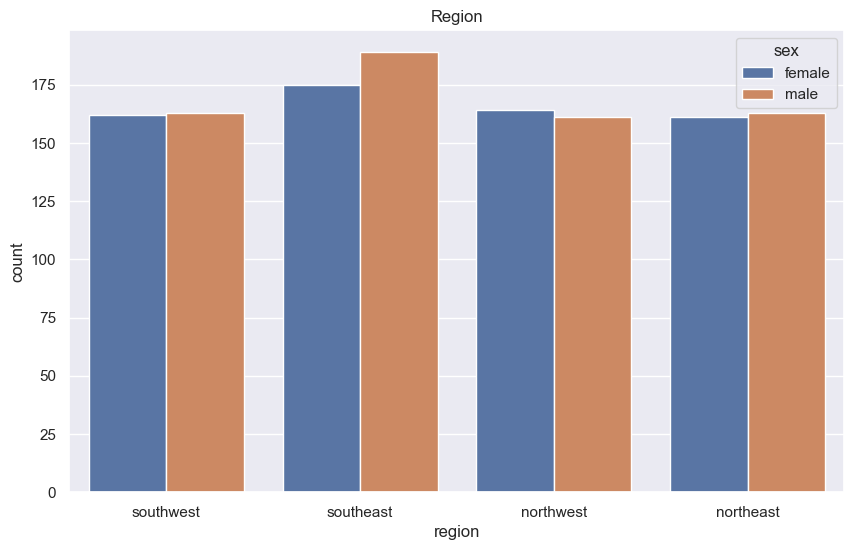

In [24]:
# lets understand which of people are smoking more and less
plt.figure(figsize=(10, 6))
sns.countplot(x = 'region', data = insurance_data, hue = 'sex')
plt.title("Region")
plt.show()

In [25]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

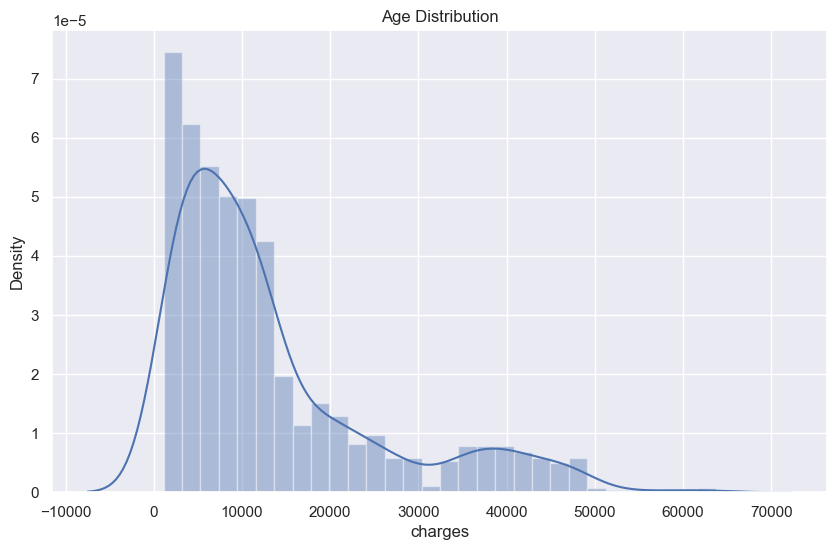

In [26]:
# Distribution of charges feature
sns.set()
plt.figure(figsize=(10, 6))
sns.distplot(insurance_data['charges'])
plt.title("Age Distribution")
plt.show()

# Data PreProcessing 

In [27]:
# convert these categorical columns to numerical values
categorical_features

['sex', 'smoker', 'region']

In [28]:
insurance_data['sex'] = np.where(insurance_data['sex'] == 'male', 1, 0)

In [29]:
insurance_data['smoker'] = np.where(insurance_data['smoker'] == 'yes', 1, 0)

In [30]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [31]:
insurance_data.replace({'region' : {'southeast' : 0 , 'southwest' : 1, 'northeast' : 2, 'northwest' : 3}}, inplace=True)

In [32]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


<Axes: >

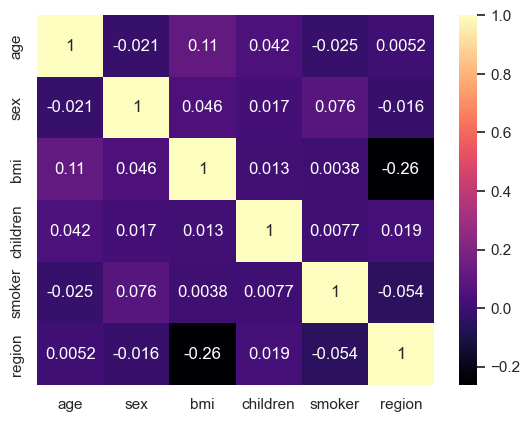

In [33]:
sns.heatmap(insurance_data.iloc[:, :-1].corr(), annot= True, cmap = 'magma')

In [34]:
# Splitting the features and target
X = insurance_data.drop(columns=['charges'], axis=1)
Y = insurance_data['charges']

In [35]:
print(X.shape, Y.shape)

(1338, 6) (1338,)


In [36]:
# splitting into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [38]:
# Model Training Using Linear Regression
# loading the Linear Regression model
regressor = LinearRegression()

In [39]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [1]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

NameError: name 'regressor' is not defined

In [41]:
# R squared value
r2_train = r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [42]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [43]:
# R squared value
r2_test = r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


In [45]:
r2_train - r2_test

0.006778256442766306

In [60]:
# save your model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(regressor, file)

In [61]:
# load your model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [59]:
model

LinearRegression()

In [66]:
model.predict([X_test.iloc[0]])[0]

1520.5924216079202

In [45]:
# Building a Predictive system
insurance_data.iloc[0, :-1]

age         19.0
sex          0.0
bmi         27.9
children     0.0
smoker       1.0
region       1.0
Name: 0, dtype: float64

In [46]:
input_data = [X_train.iloc[0]]

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[478.49404197]
The insurance cost is USD  478.4940419665909


In [47]:
# lets remove the outliers 
def detect_outlier(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [50]:
outliers_charges, low_charges, upper_charges = detect_outlier(insurance_data, 'charges')

In [51]:
outliers_charges

,age,sex,bmi,children,smoker,region,charges
14,27,1,42.130,0,1,0,39611.75770
19,30,1,35.300,0,1,1,36837.46700
23,34,0,31.920,1,1,2,37701.87680
29,31,1,36.300,2,1,1,38711.00000
30,22,1,35.600,0,1,1,35585.57600
...,...,...,...,...,...,...,...
1300,45,1,30.360,0,1,0,62592.87309
1301,62,1,30.875,3,1,3,46718.16325
1303,43,1,27.800,0,1,1,37829.72420
1313,19,0,34.700,2,1,1,36397.57600


In [52]:
low_charges

-13109.1508975

In [53]:
upper_charges

34489.350562499996

In [54]:
insurance_data = insurance_data[(insurance_data['charges'] >= low_charges) & (insurance_data['charges'] <= upper_charges)]

In [55]:
insurance_data.shape

(1199, 7)

In [57]:
1338 - 1199

139

In [43]:
insurance_data.iloc[0, -1]

16884.924

In [44]:
regressor.predict([X_train.iloc[0]])

array([478.49404197])

<Axes: >

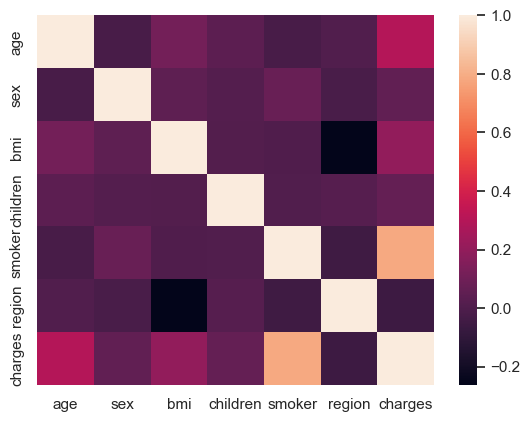

In [45]:
sns.heatmap(insurance_data.corr())

In [46]:
adjusted_rand_score(Y_test, test_data_prediction)

0.0

In [47]:
adjusted_rand_score(Y_train, training_data_prediction)

1.0

In [48]:
class SGDRegressor:
    def __init__(self, lr = 0.01 , epochs = 100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs

    def fit(self, X_train, y_train):
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0

        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0, X_train.shape[0])

                y_hat = np.dot(X_train[idx], self.coef_) + self.intercept_

                intercept_der = -2*(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr*intercept_der)

                coef_der = -2*np.dot((y_train[idx] - y_hat), X_train[idx])
                self.coef_ = self.coef_ - (self.lr* coef_der)
        print(self.intercept_, self.coef_)
    

    def predict(self, X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [49]:
sgd = SGDRegressor(lr = 0.01, epochs= 70)

In [52]:
import time
start = time.time()
sgd.fit(X_train, Y_train)
print("Time take by sgd is ", time.time() - start)

KeyError: 490

In [ ]:
y_sgd_pred = sgd.predict(X_test)